A classification problem involves predicting whether something is one thing or another.

For example, you might want to:

* Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.

* Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.

* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

In this notebook, we're going to work through a number of different classification problems with TensorFlow. In other words, taking a set of inputs and predicting what class those set of inputs belong to.

##Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles
#Make 1000 examples
n_samples = 1000

#Create circles
X , y = make_circles(n_samples,
                     noise = 0.3,
                     random_state=42)

In [2]:
#Check out features
X

array([[ 0.59171471,  0.43674853],
       [-0.45745002,  0.36160118],
       [-1.01069349,  0.83042101],
       ...,
       [-0.01985814, -1.02765007],
       [ 0.54269168, -1.11429774],
       [ 0.24539316,  1.01154823]])

In [3]:
#Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

####Visualize

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0" : X [:,0],"X1":X[:,1], "label": y })
circles

,X0,X1,label
0,0.591715,0.436749,1
1,-0.457450,0.361601,1
2,-1.010693,0.830421,1
3,-0.871696,0.414073,1
4,0.488035,-0.872587,0
...,...,...,...
995,0.312050,0.696566,0
996,-1.069302,-0.485523,0
997,-0.019858,-1.027650,1
998,0.542692,-1.114298,0


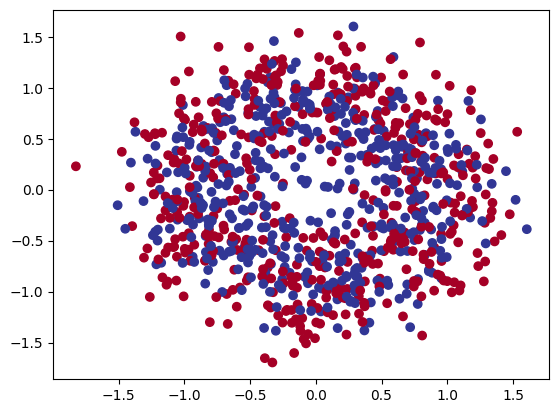

In [5]:
#Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

###Input and Output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
import tensorflow as tf

###Steps in modelling

ow we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* **Creating a model** - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).

* **Compiling a model **- defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

* **Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [8]:
#Set random seeed
tf.random.set_seed(42)


#Create model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["accuracy"]
              )
#Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 6.3100 - accuracy: 0.4770
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 6.5869 - accuracy: 0.5140
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 6.4106 - accuracy: 0.5260
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 6.2964 - accuracy: 0.5230
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 6.2224 - accuracy: 0.5210


Looking at the accuracy metric, our model performs poorly (50% accuracy on a binary classification problem is the equivalent of guessing), but what if we trained it for longer?

In [9]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X,y)

32/32 [==============================] - 1s 5ms/step - loss: 6.4120 - accuracy: 0.5200


[6.4120259284973145, 0.5199999809265137]

Even after 200 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?

In [10]:
#Set random seeed
tf.random.set_seed(42)


#Create model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["accuracy"]
              )
#Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [11]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

##Improving the model

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

2. **Compiling the model** - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.

3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer).

In [12]:
#Set random seeed
tf.random.set_seed(42)

#Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [13]:
#Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.5080


[0.7047250270843506, 0.5080000162124634]

###Visualize
To visualize our model's predictions we're going to create a function `plot_decision_boundary()` which:

* Takes in a trained model, features (X) and labels (y).

* Creates a meshgrid of the different X values.

* Makes predictions across the meshgrid.

* Plots the predictions as well as a line between the different zones (where each unique class falls).

In [14]:
import numpy as np

def plot_decision_boundary(model,X,y):
   """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
   """
   #Define the axis boundary created by the model predicting on X
   x_min,x_max = X[:,0].min() - 0.1 , X[:,1].max() + 0.1
   y_min,y_max = X[:,1].min() - 0.1 , X[:,0].max() + 0.1

   xx,yy = np.meshgrid(np.linspace(x_min, x_max,100),
                       np.linspace(x_min, x_max,100))
   #Create X value
   x_in = np.c_[xx.ravel(), yy.ravel()] #Stack 2D arrays

   #Make predictions
   y_pred = model.predict(x_in)

   #Check for the multiclass
   if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    #Reshape our predictions for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)

   else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  #Plot decision boundary
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1], c=y, s=40 ,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())



313/313 [==============================] - 1s 1ms/step
doing binary classification


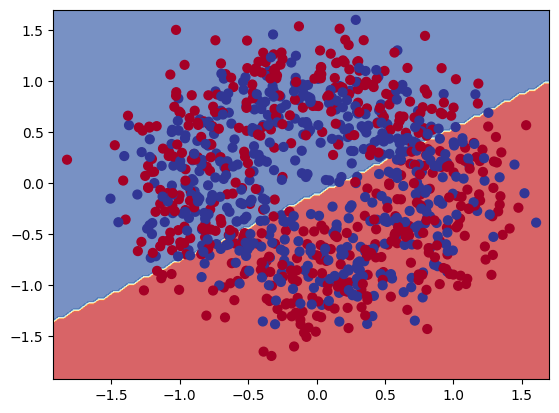

In [15]:
#Check out predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [16]:
#Let's see if our model can be used for regression problem
tf.random.set_seed(42)

#Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

#Split our data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]



In [17]:
#Set random seeed
tf.random.set_seed(42)

#Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae"])
#Fit our model to regression data
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 484.5831 - mae: 484.5831
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 391.8133 - mae: 391.8133
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 302.2441 - mae: 302.2441
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 208.6525 - mae: 208.6525
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 109.8262 - mae: 109.8262
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 50.6067 - mae: 50.6067
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 76.6875 - mae: 76.6875
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 66.0444 - mae: 66.0444
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 45.5720 - mae: 45.5720
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 49.3525 - mae: 49.3525
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 5ms/step


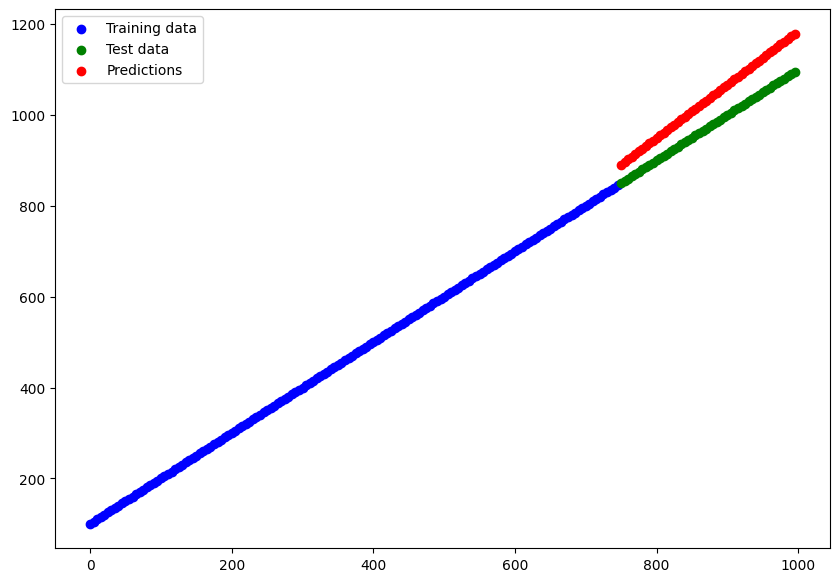

In [18]:
#Make predictions
y_reg_preds = model_3.predict(X_reg_test)

#plot the model
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test, c="g",label="Test data")
plt.scatter(X_reg_test, y_reg_preds,c="r",label="Predictions")
plt.legend()



###The missing piece: Non-linearity

In [19]:
#Set random seeed
tf.random.set_seed(42)

#Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

#Compile
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#Fit
history = model_4.fit(X,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3989 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2643 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0317 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9262 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8679 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7506 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6047 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.4107 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.1031 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 2.5914 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


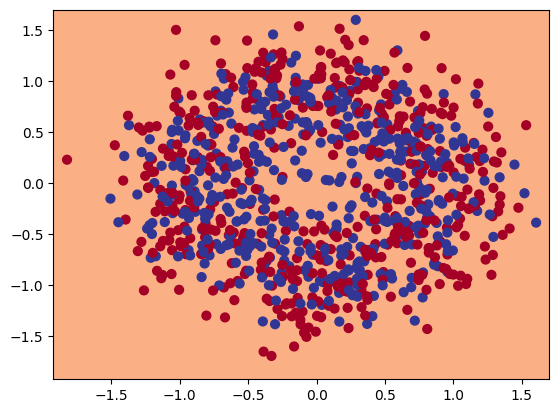

In [20]:
#Decision boundary for our lates model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Building our first neural network with non-linear activation function

In [21]:
#Set random seeed
tf.random.set_seed(42)

#Create model with non-linear activation function
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = tf.keras.activations.relu)
])

#Compile the model
model_5.compile(loss="binary_crossentropy",
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                          metrics = ["accuracy"])

#Fit the model
history_2 = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.3025 - accuracy: 0.4740
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2628 - accuracy: 0.4730
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2295 - accuracy: 0.4730
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2153 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2086 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1947 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1898 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1863 - accuracy: 0.4730
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1566 - accuracy: 0.4730
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1336 - accuracy: 0.4740
Epoch 11/

In [22]:
#Set random seeed
tf.random.set_seed(42)

#Create model with non-linear activation function
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

#Compile the model
model_6.compile(loss="binary_crossentropy",
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                          metrics = ["accuracy"])

#Fit the model
history_3 = model_6.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [23]:
#Evaluate our model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classification


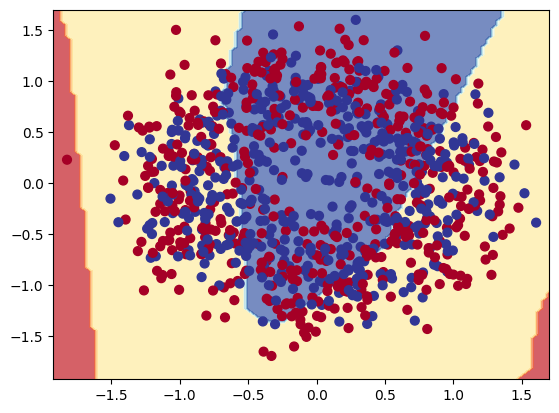

In [24]:
#How our model prediction look like
plot_decision_boundary(model_6,X,y)

In [25]:
#Set random seeed
tf.random.set_seed(42)

#Create model with non-linear activation function
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

#Compile the model
model_7.compile(loss="binary_crossentropy",
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                          metrics = ["accuracy"])

#Fit the model
history_4 = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5200
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5330
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5190
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5210
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5070
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5270
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5380
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5350
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5260
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


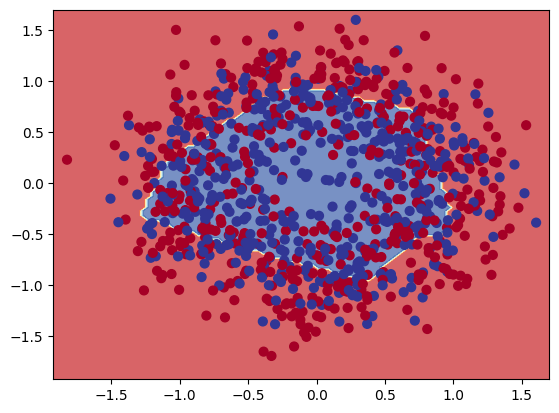

In [26]:
plot_decision_boundary(model_7,X,y)

In [27]:
#Create a toy tensor
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

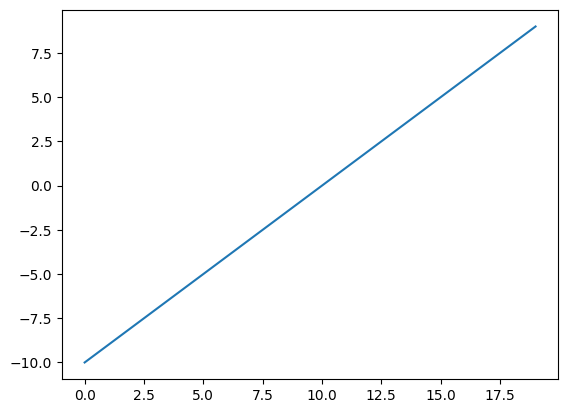

In [28]:
#Visualize our toy tensor
plt.plot(A)

In [29]:
#Replicating sigmoid function
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [30]:
#Using sigmoid function on toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

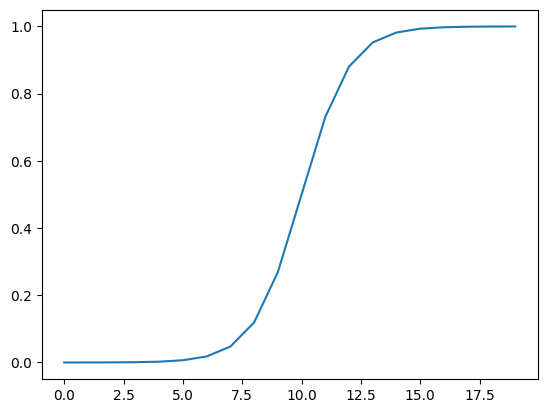

In [31]:
#plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [32]:
#Recreate relu function
def relu(x):
  return tf.maximum(x,0)

In [33]:
#Using relu function on toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

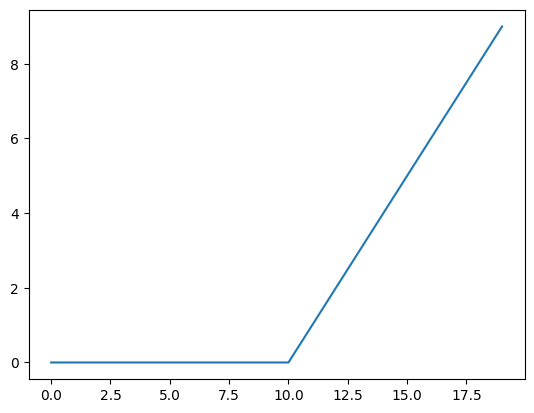

In [34]:
#plot our toy tensor transformed by relu
plt.plot(relu(A))

In [35]:
#Try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

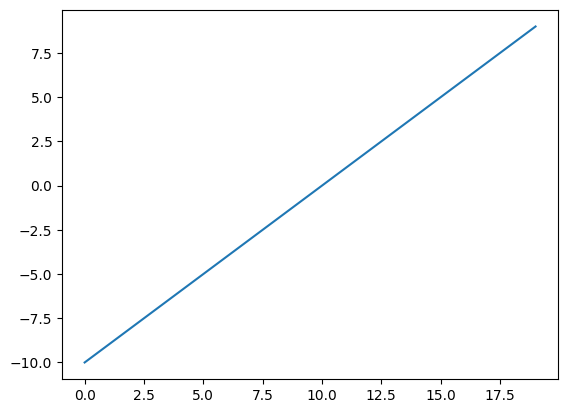

In [36]:
plt.plot(tf.keras.activations.linear(A))

###Evaluating and improving our classification

In [37]:
#Split into train and test data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [39]:
#Recreate the model to fit on the training data and evaluate on test data
#Set random seeed
tf.random.set_seed(42)

#Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile
model_8.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["accuracy"])

#Fit
history_5 = model_8.fit(X_train,y_train,epochs=25,verbose=0)

In [40]:
#Evaluate model
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.7627 - accuracy: 0.5100


[0.7626734375953674, 0.5099999904632568]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


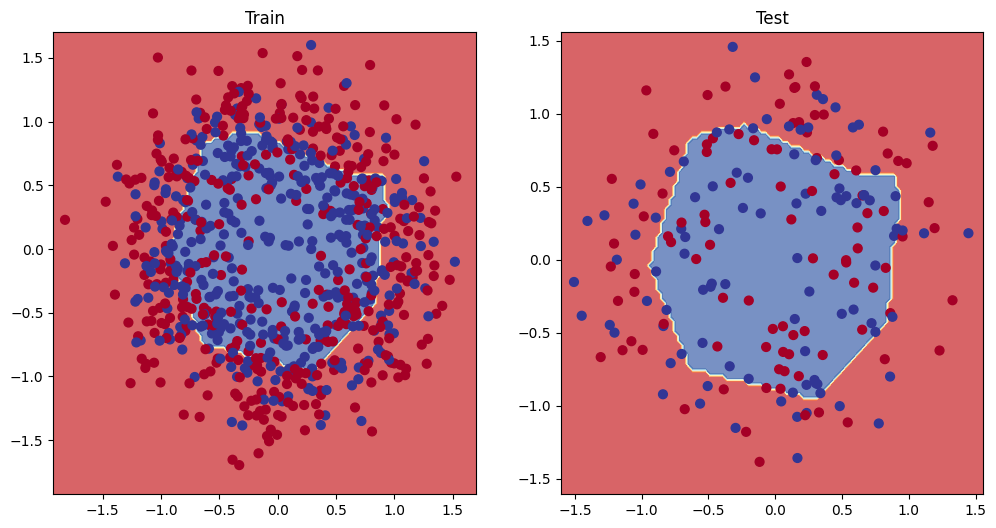

In [41]:
#plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X_test,y_test)


##Plot the loss (or training) curve

In [42]:
#Convert the history object into Dataframe
pd.DataFrame(history_5.history)

,loss,accuracy
0,0.692877,0.48500
1,0.689666,0.53250
2,0.685623,0.56875
3,0.681910,0.60000
4,0.676597,0.57750
5,0.667746,0.59500
6,0.658146,0.64000
7,0.652509,0.61500
8,0.651262,0.63500
9,0.641640,0.63875


Text(0.5, 1.0, 'Model_8 loss curve')

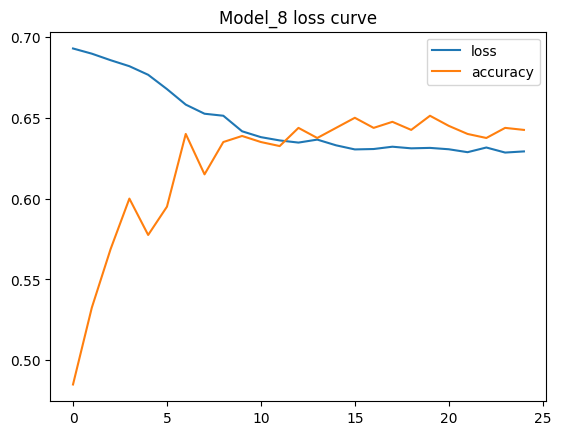

In [43]:
#plot the loss curve
pd.DataFrame(history_5.history).plot()

plt.title("Model_8 loss curve")

###Finding the best learning rate
To find the ideal learning rate
* A learning rate **callback** - callback can be said as the extra piece of functionality we can add *while* it's training
* Another model (but we can use the same one)
* A modified loss curve plot.

In [44]:
#Set random seeed
tf.random.set_seed(42)

#Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile
model_9.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["accuracy"])

#Learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10 ** (epoch/20))

#Fit
history_6 = model_9.fit(X_train,y_train,epochs=100,verbose=0,callbacks=[lr_scheduler])

<Axes: xlabel='epochs'>

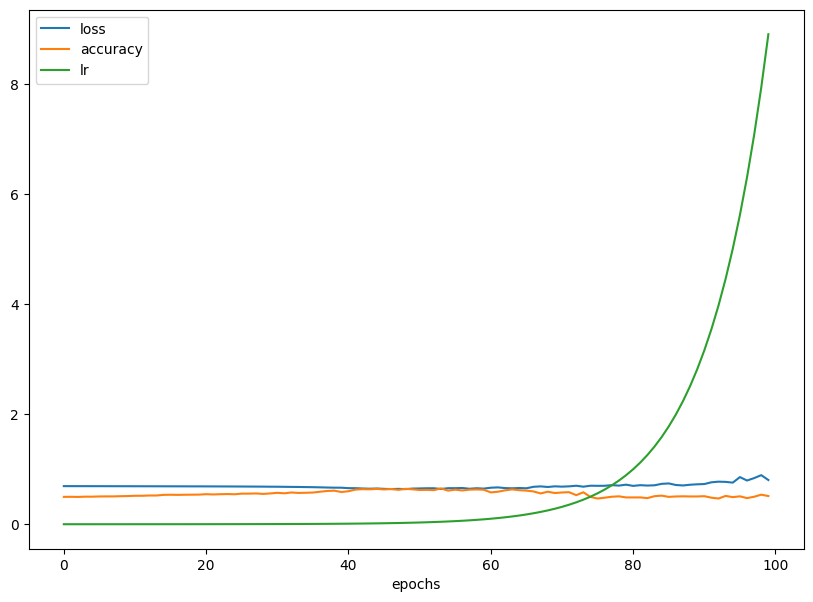

In [45]:
#Checking history
pd.DataFrame(history_6.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

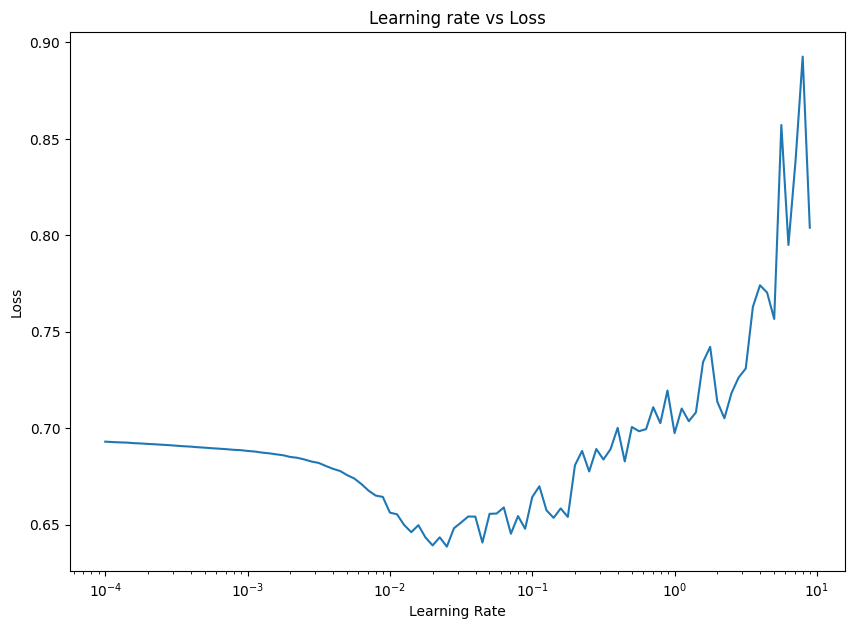

In [46]:
#plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_6.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [47]:
#Examples of other typical learning rate
print(10**0)
print(10**-1)
print(10**-2)
print(10**-3)
print(1e-4)

1
0.1
0.01
0.001
0.0001


In [48]:
#Let's try using higher (ideal) learning rate with the same model
#Set random seeed
tf.random.set_seed(42)

#Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile
model_10.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics = ["accuracy"])



#Fit
history_6 = model_10.fit(X_train,y_train,epochs=20,verbose=1)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6982 - accuracy: 0.4675
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4800
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5250
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5288
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5250
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5337
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.5350
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.5412
Epoch 9/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6831 - accuracy: 0.5412
Epoch 10/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6812 - accuracy: 0.5437
Epoch 11/20
25/25 [

In [49]:
#Evaluate model
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.4900


[0.6986865401268005, 0.49000000953674316]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


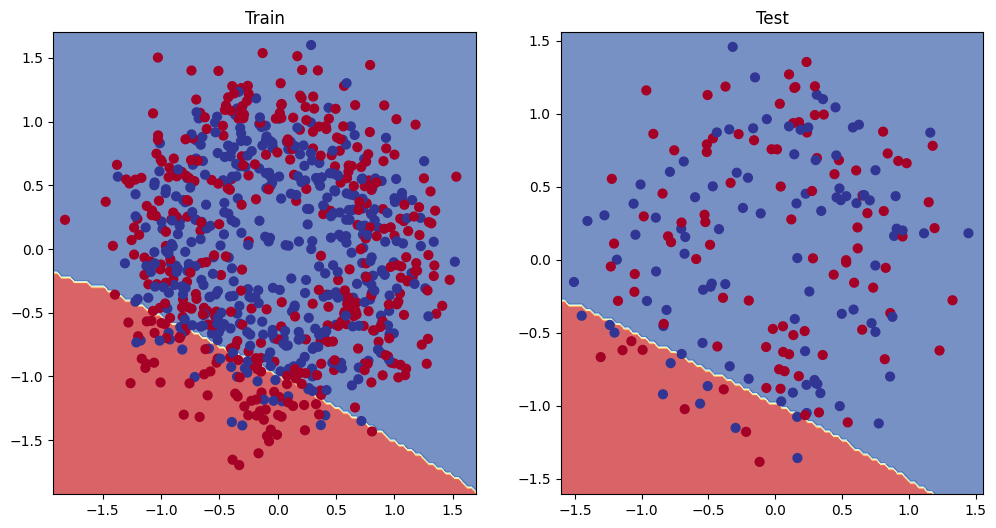

In [50]:
#Plot decision boundaries for training and test data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X_test,y_test)

###More classification evaluation methods
Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report


In [51]:
#Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.4900
Model loss on test set: 0.6986865401268005
Model accuracy on test set: 49.00%


In [52]:
#Create confusion matrix
from sklearn.metrics import confusion_matrix

#Make predictions
y_pred= model_10.predict(X_test)


7/7 [==============================] - 0s 2ms/step


In [53]:
#confusion_matrix(y_test,y_pred)

It looks like we need to get our predictions into the binary format (0 or 1).

But you might be wondering, what format are they currently in?

In their current format (`9.8526537e-01`), they're in a form called **prediction probabilities**.

You'll see this often with the outputs of neural networks. Often they won't be exact values but more a probability of how likely they are to be one value or another.

So one of the steps you'll often see after making predicitons with a neural network is converting the prediction probabilities into labels.

In our case, since our ground truth labels (`y_test`) are binary (0 or 1), we can convert the prediction probabilities using to their binary form using `tf.round().`

In [54]:
y_test[:10], y_pred[:10]

(array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0]),
 array([[0.5405832],
        [0.5405832],
        [0.5405832],
        [0.5405832],
        [0.3522731],
        [0.5405832],
        [0.5405832],
        [0.5405832],
        [0.3623359],
        [0.5405832]], dtype=float32))

In [55]:
#Convert the prediction probabilities to binary format
confusion_matrix(y_test,tf.round(y_pred))

array([[ 8, 92],
       [10, 90]])

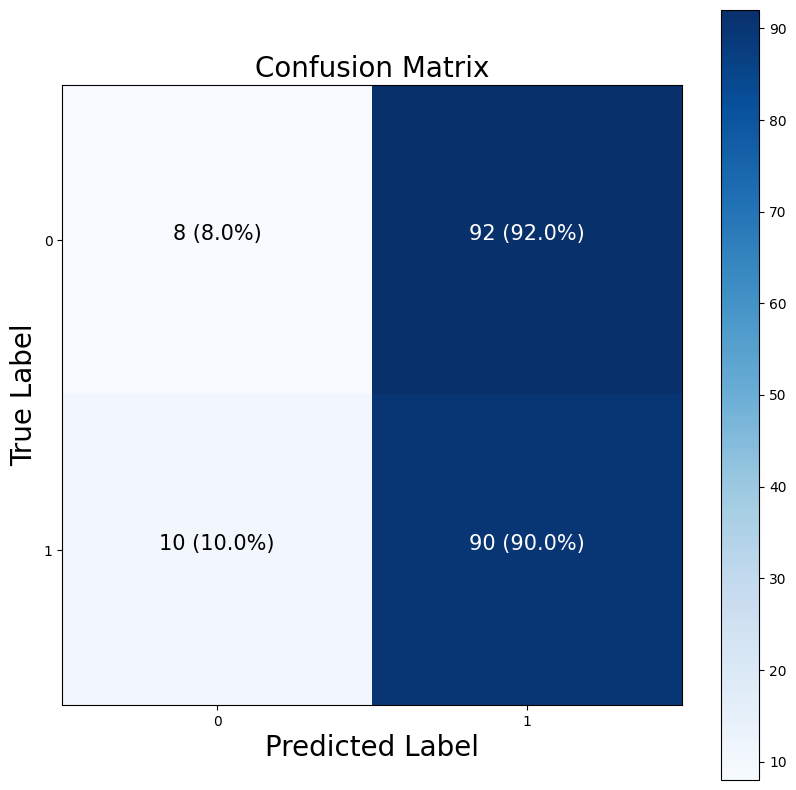

In [56]:
import itertools

figsize = (10,10)

#Create Confusion matrix
cm = confusion_matrix(y_test,tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] #normalize our confusion matrix
n_classes = cm.shape[0]

#Let's prettify it
fig , ax = plt.subplots(figsize=figsize)

#Create a matrix plot
cax = ax.matshow(cm , cmap = plt.cm.Blues)
fig.colorbar(cax)

#Create Classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

#Label the axes
ax.set(title="Confusion Matrix",
       xlabel = "Predicted Label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

#Set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2
# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)